[*********************100%***********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-02  1518.099976  1528.699951  1518.000000  1524.500000  1524.500000   
2020-01-03  1530.099976  1552.699951  1530.099976  1549.199951  1549.199951   
2020-01-06  1580.000000  1580.000000  1560.400024  1566.199951  1566.199951   
2020-01-07  1558.300049  1576.300049  1558.300049  1571.800049  1571.800049   
2020-01-08  1579.699951  1604.199951  1552.300049  1557.400024  1557.400024   

            Volume  
Date                
2020-01-02     214  
2020-01-03     107  
2020-01-06     416  
2020-01-07      47  
2020-01-08     236  


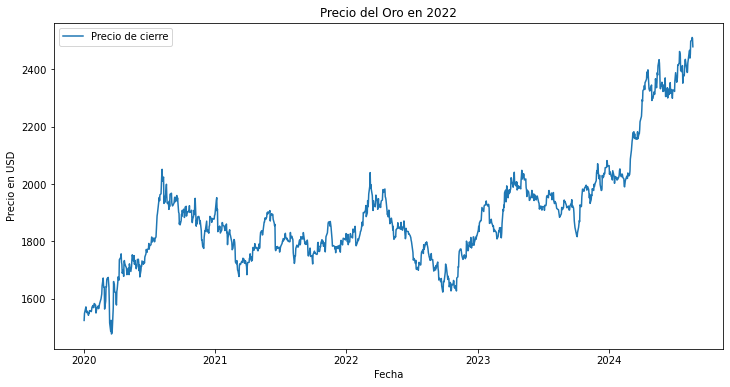

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

gold_symbol = 'GC=F'  # Contrato de futuros del oro

# Rango de fechas
start_date = '2020-01-01'
end_date = '2024-08-23'

# Descarga de datos
gold_data = yf.download(gold_symbol, start=start_date, end=end_date)

#Primeros 5 registros
print(gold_data.head())

# Grafico
plt.figure(figsize=(12,6))
plt.plot(gold_data['Close'], label='Precio de cierre')
plt.title('Precio del Oro en 2022')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.legend()
plt.show()



[*********************100%***********************]  1 of 1 completed


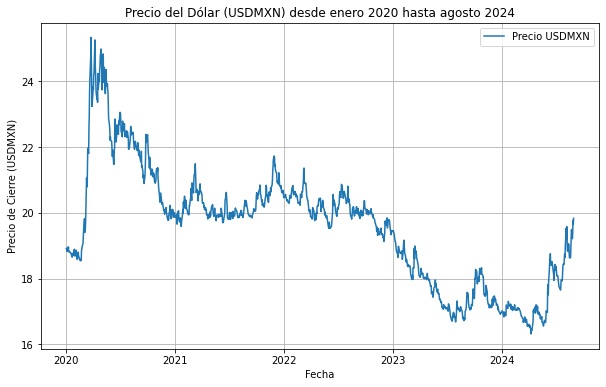

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

data = yf.download('USDMXN=X', start='2020-01-01', end='2024-08-31')

plt.figure(figsize=(10,6))
plt.plot(data.index, data['Close'], label='Precio USDMXN')
plt.title('Precio del Dólar (USDMXN) desde enero 2020 hasta agosto 2024')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USDMXN)')
plt.grid(True)
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Intercepto: 19.341704165152283
Coeficiente para la varianza del precio del oro: 0.0006454843601152561


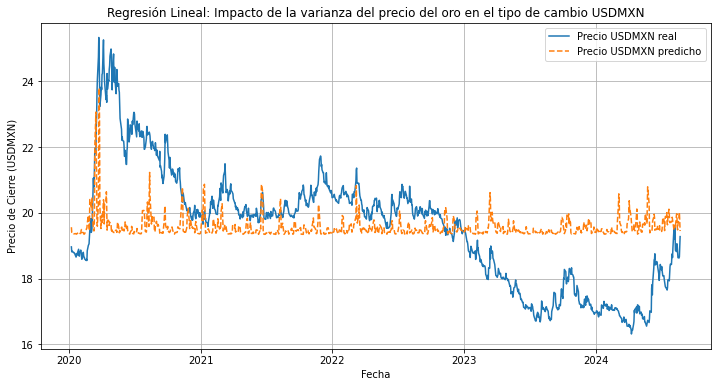

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Símbolos de los datos
gold_symbol = 'GC=F'  # Contrato de futuros del oro
usdmxn_symbol = 'USDMXN=X'  # Tipo de cambio del dólar al peso mexicano

# Rango de fechas
start_date = '2020-01-01'
end_date = '2024-08-23'

# Descarga de datos de oro
gold_data = yf.download(gold_symbol, start=start_date, end=end_date)

# Descarga de datos del tipo de cambio USDMXN
usdmxn_data = yf.download(usdmxn_symbol, start=start_date, end=end_date)

# Unir ambos datasets por la fecha
merged_data = pd.merge(gold_data['Close'], usdmxn_data['Close'], 
                       left_index=True, right_index=True, how='inner', 
                       suffixes=('_gold', '_usdmxn'))

# Renombrar columnas para facilitar el acceso
merged_data.columns = ['gold_price', 'usdmxn_price']

# Calcular la varianza del precio del oro (utilizaremos una ventana de 5 días para la varianza)
merged_data['gold_var'] = merged_data['gold_price'].rolling(window=5).var()

# Eliminar los valores nulos que resultan de la ventana de la varianza
merged_data.dropna(inplace=True)

# Definir las variables para la regresión
X = merged_data[['gold_var']]  # Variable independiente: varianza del precio del oro
y = merged_data['usdmxn_price']  # Variable dependiente: tipo de cambio USDMXN

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Obtener los coeficientes del modelo
intercept = model.intercept_
coef_gold_var = model.coef_[0]

# Mostrar resultados
print(f"Intercepto: {intercept}")
print(f"Coeficiente para la varianza del precio del oro: {coef_gold_var}")

# Predicciones
predictions = model.predict(X)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, y, label='Precio USDMXN real')
plt.plot(merged_data.index, predictions, label='Precio USDMXN predicho', linestyle='--')
plt.title('Regresión Lineal: Impacto de la varianza del precio del oro en el tipo de cambio USDMXN')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USDMXN)')
plt.legend()
plt.grid(True)
plt.show()


